## Objective

#### Build a system that can predict if a Thyroid Cancer survivor can relapse(his or her cancer reoccurs)

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\Pankaj\\OneDrive\\Desktop\\thyroid.csv")

In [5]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [6]:
df.drop("Response",axis=1,inplace=True)

In [7]:
feature_cols = ["Age","Gender","Smoking","Hx Smoking","Hx Radiothreapy","Thyroid Function","Physical Examination","Adenopathy","Pathology","Focality","Risk","T","N","M","Stage","Recurred"]

In [8]:
df.columns = feature_cols

In [9]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Yes


## splitting target

In [11]:
Recurred = df.Recurred
create =Recurred.str.split('([A-Za-z]+)', expand=True)
create = create[1]
target = create.replace({None:'Z'}) #here z is none type
df.target = Recurred

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_21060\2809865125.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = Recurred


In [12]:
df.Recurred.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df = df.replace(['?'],np.nan)

In [14]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Recurred                0
dtype: int64

In [15]:
# now we will impute the null values with knn imputer
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Recurred              383 non-null    ob

In [17]:
# we can't find corr for all variable because some of the features are in categorial object so we want to do label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
cols = df.select_dtypes(include=['object'])

In [19]:
for i in cols.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [20]:
# now we can see their is correlation in some features
for a in range(len(df.corr())):
    for b in range(a):
        if((df.corr().iloc[a,b]) >= 0.7):
            print(df.corr().columns[b])

df.hist(bins=25,figsize=(20,20));

## preprocessing techniques

In [23]:
# X and Y split

X = df.drop('Recurred',axis=1)
y = df.Recurred
df2 = X # for on-going process without PCA

In [24]:
y.unique() # we can see there is 29 types are present => 29 categorigal values

array([0, 1])

## PCA Techniques

#### First we use PCA then see the result then we move to normal modeling(without PCA)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [28]:
v = pca.fit_transform(X)

In [29]:
X_pca = pd.DataFrame(data = v, columns = ['Age', 'Gender', 'Smoking','Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality'])


In [30]:
X_pca

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality
0,-13.920566,-1.654489,-0.771453,-0.450597,0.403076,0.749467,0.118092,0.560598,-0.094017,-0.011181
1,-6.907605,-0.975122,-2.399488,0.341095,0.328622,0.631486,0.263982,0.575899,0.013569,0.304329
2,-10.931555,-2.195561,-0.006530,-0.856515,0.356472,0.790125,0.037236,0.480371,-0.102234,-0.086706
3,21.040526,-3.232724,-0.282134,-0.905913,-0.140380,0.680065,-0.013897,-0.110353,-0.162864,0.000504
4,21.072780,-1.749021,-2.646011,0.352646,-0.130475,0.605023,0.278550,-0.102578,-0.051085,-0.714662
...,...,...,...,...,...,...,...,...,...,...
378,31.296875,1.908819,4.398151,2.032307,-0.104837,-0.026935,-0.409120,2.097960,0.471372,0.974339
379,40.350818,4.490389,0.895249,-0.302829,-0.163659,-0.126884,-0.311260,1.832567,0.212631,0.134080
380,31.367391,5.137354,0.710137,-1.186414,0.014008,-0.097186,-0.303363,2.003637,0.244637,0.220387
381,20.356062,4.758127,0.651811,-0.160467,2.034853,0.518808,-1.979282,0.777460,0.383106,0.223197


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

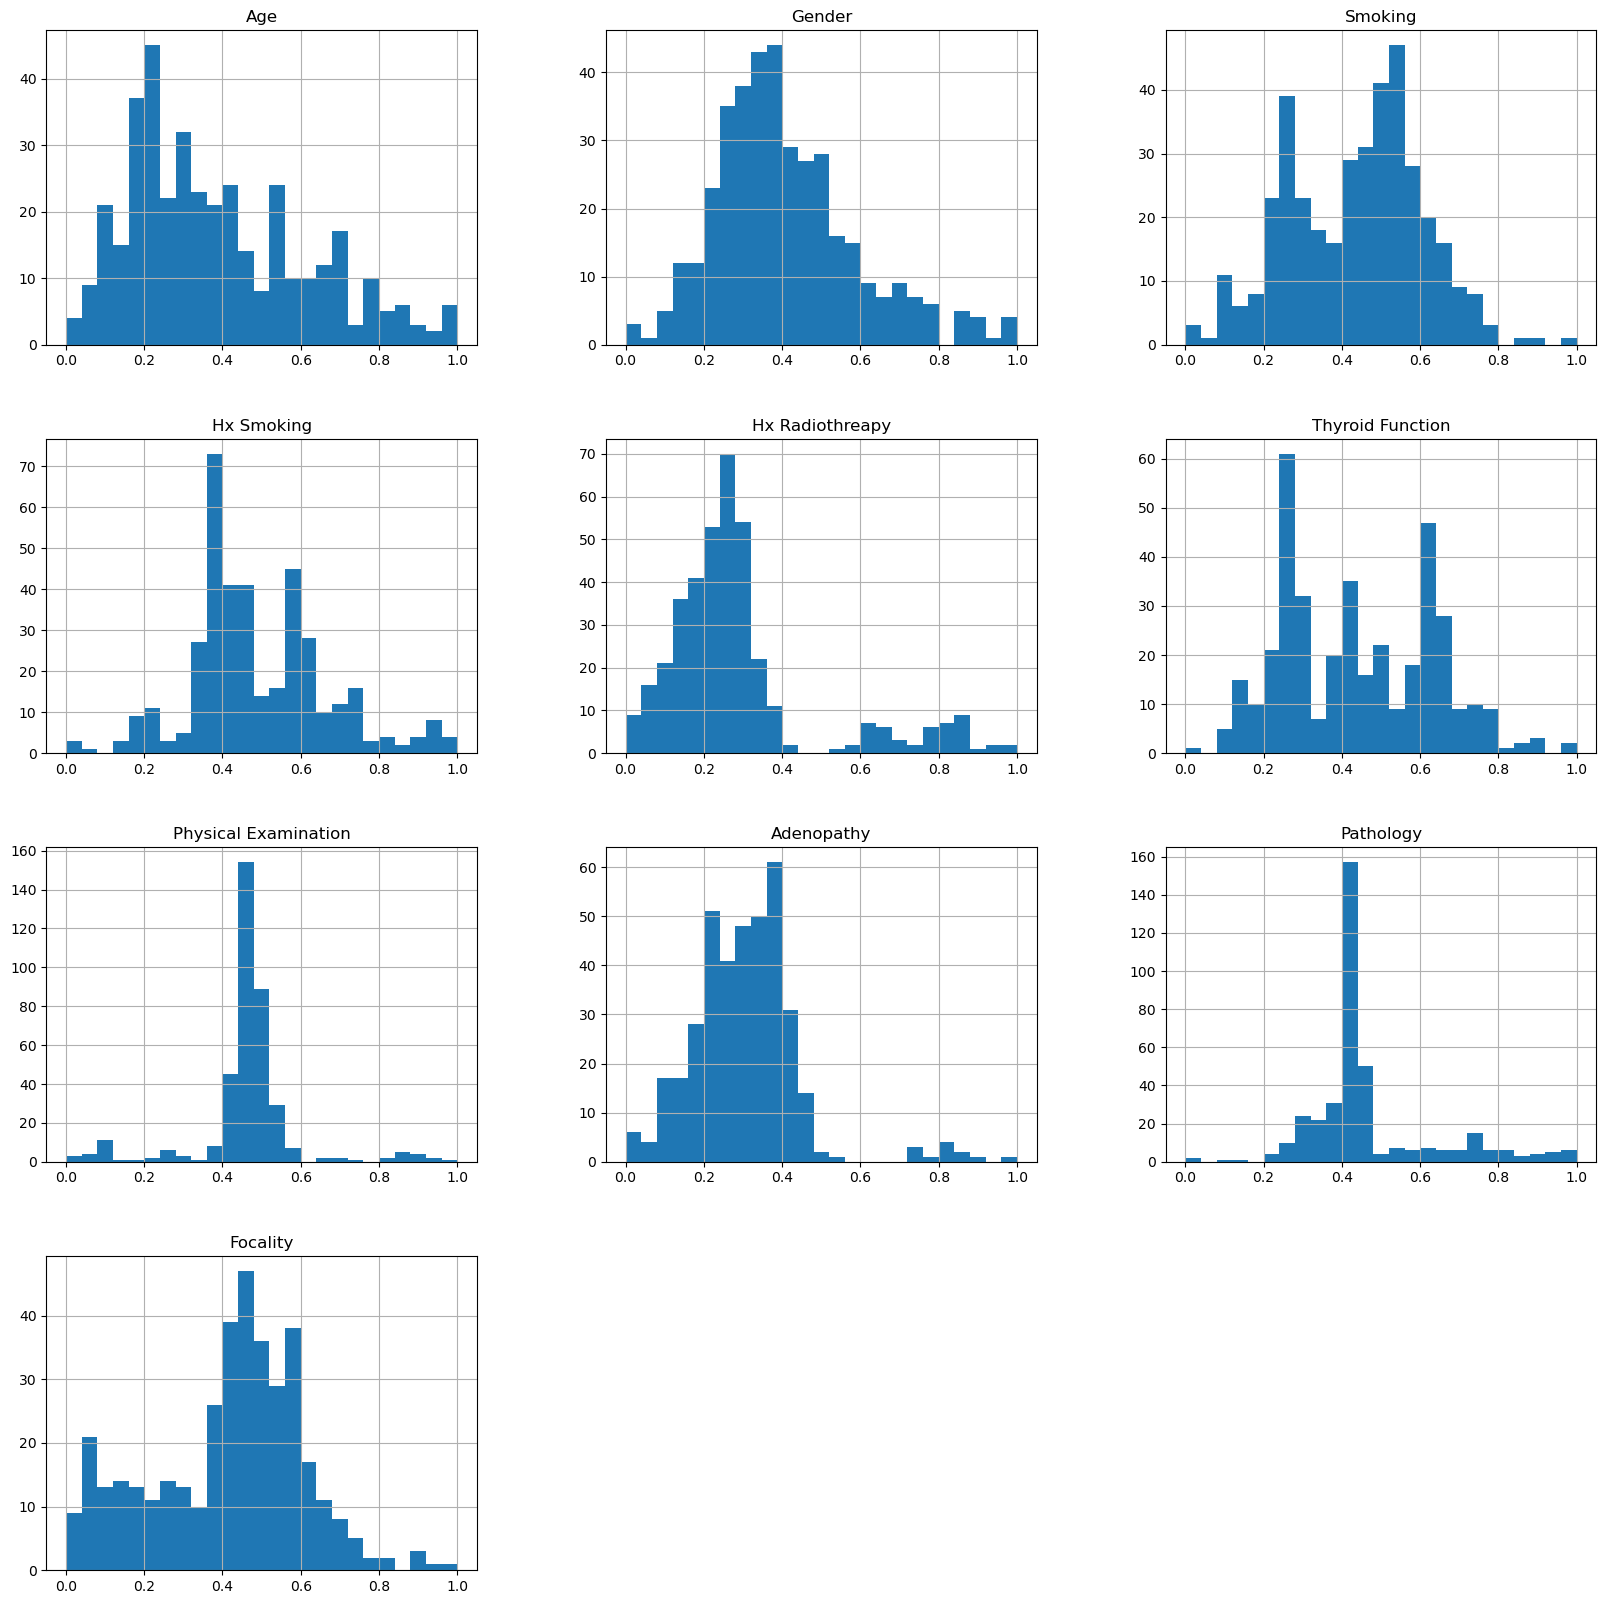

In [33]:
X_pca.hist(bins=25,figsize=(20,20));

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

## Model Selection

In [36]:
from sklearn.metrics import accuracy_score

## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [39]:
accuracy_score(treepredict,y_test)

0.8503937007874016

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.8582677165354331

## K-NN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)

In [44]:
accuracy_score(y_pred,y_test)

0.8818897637795275

## SVM


In [46]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7086614173228346

## logisitic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8740157480314961

### Now we can say that the K-NN classifier is provide the best result as 88% 